In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\piyus\Downloads\data.csv")
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [4]:
df.shape

(1143, 15)

# Descriptive Statistics

In [5]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,761.000000,761.000000
mean,9.872611e+05,33.884514,1.180606e+05,42.474191,6.872500e+04,11.629921,17.597760,2.161629,0.768725
std,1.939928e+05,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,16.000000,2.200000e+01,19.000000,1.442650e+02,1.000000,0.000000,1.000000,0.000000
50%,1.121185e+06,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,1.000000,0.000000
75%,1.121804e+06,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,2.000000,1.000000
max,1.314415e+06,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


#What does this suggest?

#1.Highly Skewed Performance

#Impressions, clicks, and spent all have high maximum values but low median.

#This means a few ads are performing extremely well, but most ads are underperforming.

#2. Low Overall Engagement

#Average click rate is very low.

#Many ads have 0 clicks and 0 conversions, despite having impressions.
#This suggests poor ad content or poor audience targeting.

#3. Money Is Being Spent But Not Always Efficiently

#Spending distribution shows many low-budget ads and a few high-budget ones.

#Some ads spent money but got 0 conversions, meaning wasted budget.

#4. Conversion Approval Rate Is Low

#Total conversions = 2.16 avg, approved conversions = 0.76 avg.

#Many conversions are not validated/approved → could be fake, fraudulent, or unqualified leads.

#5. Targeting Needs Optimization

#Interests (interest1, interest2, interest3) show wide variability.

#Suggests that the choice of interest category heavily affects impressions and conversions.

# Inferential Stats

In [6]:
corr = df[['spent','impressions','clicks','approved_conversion']].corr()

<Axes: >

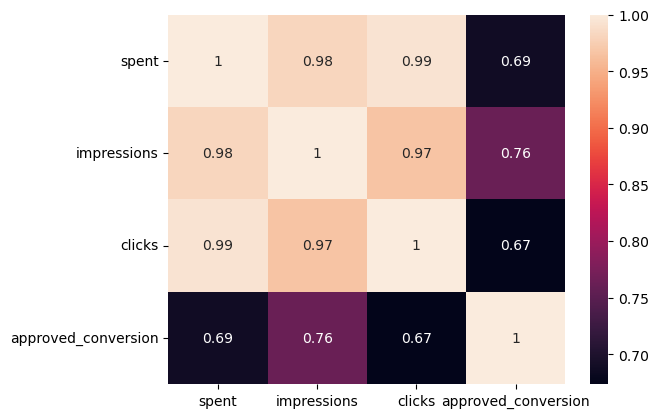

In [7]:
sns.heatmap(corr, annot = True)

#This suggests that the the amount spent is highly correlated with impressions you create ie. the more you spent on an ad campaign the more impressions we get but still the impressions does not lead to high approved conversion because our correlation matrix shows weak correlation between impressions and approved coversions. This suggest that we need to create more impression on people in order to get more approved conversions 

In [8]:
df['CTR'] = (df['clicks'] / df['impressions']) * 100
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.013605
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.000000
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195


#Click-Through Rate (CTR) is a digital marketing metric that measures how often people click on an advertisement after seeing it.

In [9]:
rev_per_conversion = 100 
df['ROI'] = ((df['approved_conversion'] * rev_per_conversion) - df['spent']) / df['spent'] * 100

In [10]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,ROI
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.013605,6893.007247
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,-100.000000
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.000000,NaN
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,-100.000000
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,7651.938213


#rev_per_conversion is revenue generated per conversion since we dont have a separate revenue column, i have assummed it to be 100 per conversion just to demonstrate on how to calculate ROI. 
#Negative Values in the data suggest that investment didn't pay off and we spent more than we gained

# Data Cleaning and Visualization

In [11]:
df.isnull().sum()

ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
total_conversion       382
approved_conversion    382
CTR                      0
ROI                    514
dtype: int64

In [12]:
df['approved_conversion'].unique()

array([ 1.,  0.,  3.,  2., 14.,  5., 10., 17., 21.,  4.,  9.,  7.,  8.,
       12.,  6., nan])

In [13]:
df['ROI'] = df['ROI'].fillna(0)

In [14]:
df.dropna(subset=['approved_conversion','total_conversion'], inplace=True)
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion,CTR,ROI
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0,0.013605,6893.007247
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0,0.011198,-100.000000
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0,0.000000,0.000000
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0,0.023480,-100.000000
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0,0.024195,7651.938213


In [15]:
df.shape

(761, 17)

In [16]:
df['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [17]:
agg_df = df.groupby(['age', 'gender'])[['impressions', 'clicks']].sum().reset_index()

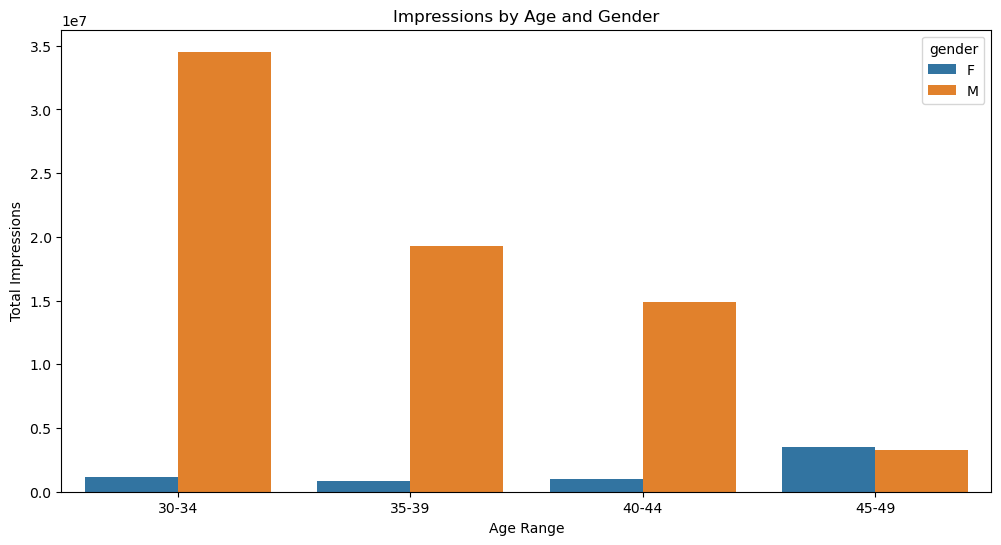

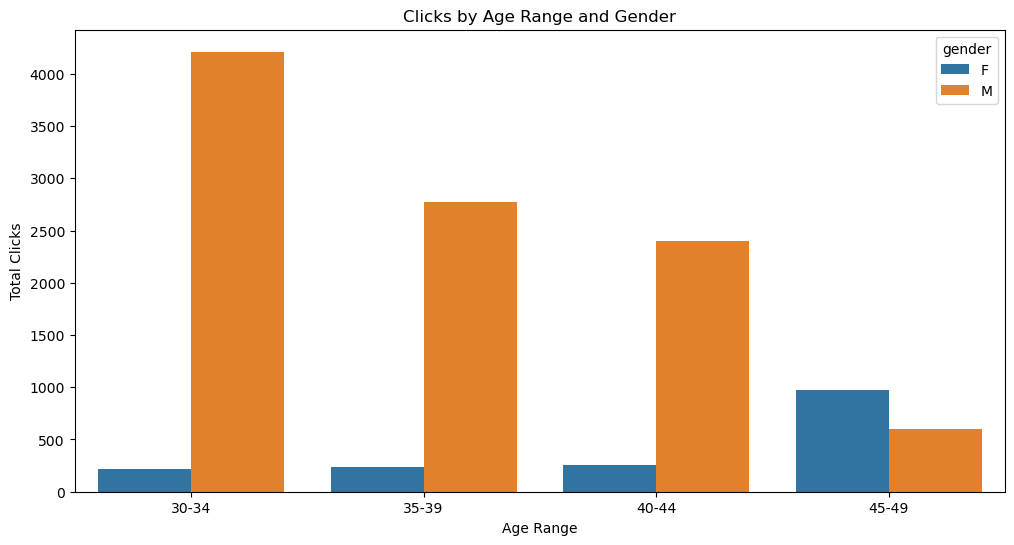

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=agg_df, x='age', y='impressions', hue='gender')
plt.title('Impressions by Age and Gender')
plt.xlabel('Age Range')
plt.ylabel('Total Impressions')
plt.show()

# Clicks by Age Range and Gender
plt.figure(figsize=(12,6))
sns.barplot(data=agg_df, x='age', y='clicks', hue='gender')
plt.title('Clicks by Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Total Clicks')
plt.show()

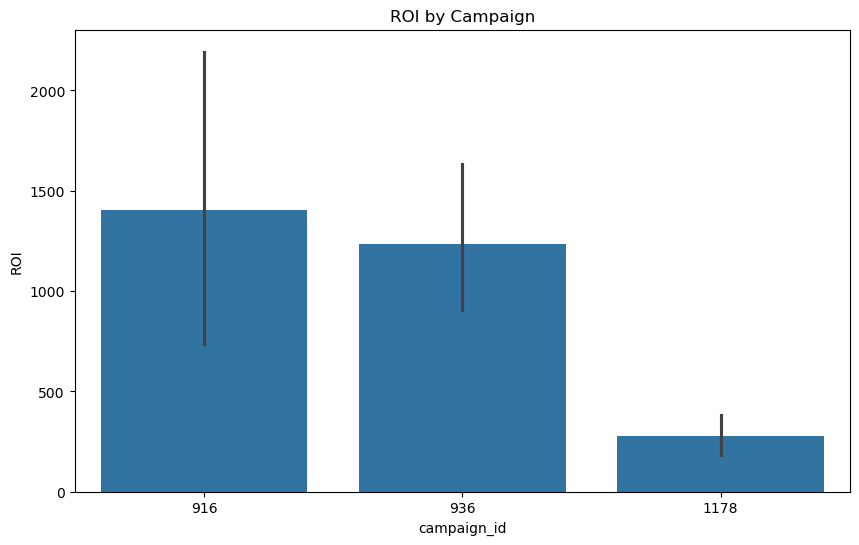

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='campaign_id', y='ROI', data=df)
plt.title('ROI by Campaign')
plt.show()

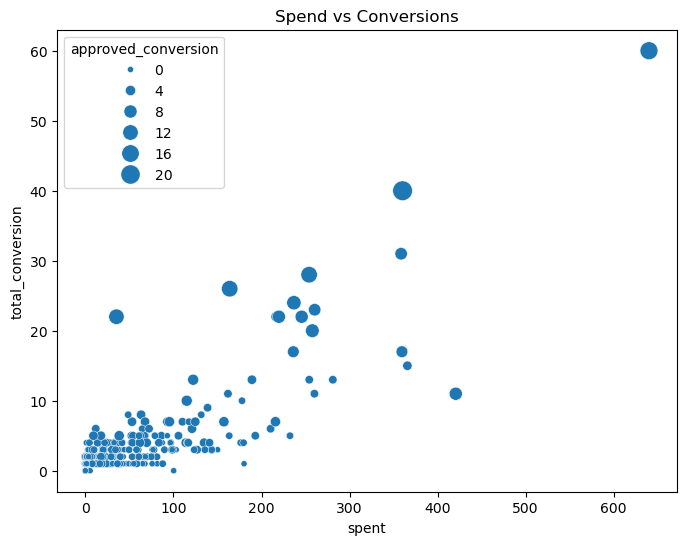

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='spent', y='total_conversion', size='approved_conversion', data=df, sizes=(20,200))
plt.title('Spend vs Conversions')
plt.show()

#This shows the more you spent the more conversions

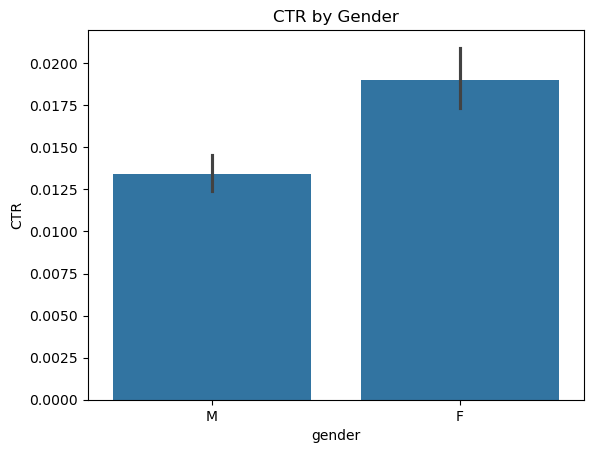

In [22]:
sns.barplot(x='gender', y='CTR', data=df)
plt.title('CTR by Gender')
plt.show()

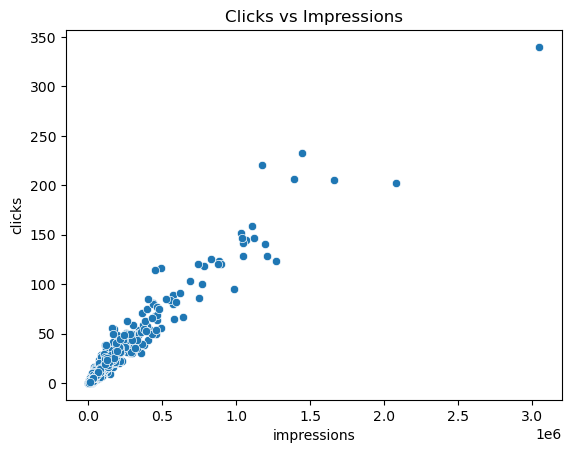

In [23]:
sns.scatterplot(x='impressions', y='clicks', data=df)
plt.title("Clicks vs Impressions")
plt.show()